# Лабораторная работа №2

\begin{cases} 
b_1 x_1 + c_1 x_2 = f_1 \\
a_2 x_1 + b_2 x_2 + c_2 x_3 = f_2 \\
a_3 x_1 + b_3 x_2 + c_3 x_3 = f_3 \\
... \\
a_n x_{n-1} + b_n x_n + c_n x_{n+1} = f_n \\
p_1 x_1 + ... + p_{n+1} x_{n+1} = f_{n+1} \\
n = 99 \\
a_i = c_i = 1 \\
b_i = 10 \\
p_i = 1 \\
f_i = i
\end{cases}


In [91]:
from math import sqrt
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [92]:
def initMatrix(n=99, a=1, b=10, c=1, p=1):
    matrix = []
    
    for ind in range(n):
        matrix.append([])
        
        if ind != 0:
            matrix[ind].extend([0]*(ind-1))
            matrix[ind].extend([a, b, c])
            matrix[ind].extend([0]*(n-ind-1))
        else:
            matrix[ind].extend([b,c])
            matrix[ind].extend([0]*(n-ind-1))

    matrix.append([p]*(n+1))
    
    return matrix


def initValue(n=99):
    return [ind + 1 for ind in range(n + 1)]


def createMatrix(n=99, a=1, b=10, c=1, p=1):
    matrix = initMatrix(n, a, b, c, p)
    
    for ind in range(n+1):
        matrix[ind].append(ind+1)

    return matrix

def getErrorMatrixNorm(list):
    return sqrt(sum(list[ind]**2 for ind in range(len(list))))

def printErrorNorm(matrix_list, x, value_list):
    error_list = []

    for ind in range(len(matrix_list)):
        error_list.append(value_list[ind] - sum(matrix_list[ind][i]*x[i] for i in range(len(x))))

    # print('Error vector:', error_list)
    print('Error norm value:{:.2e}'.format(getErrorMatrixNorm(error_list)))


def m_getErrorMatrixNorm(A, x, b):
    error = np.dot(A, x) - b
    return getErrorMatrixNorm(error.tolist())


def buildPlot(all_errors_list, name='plot', dpi=500):
    plt.figure(figsize=(10, 6))
    plt.plot(all_errors_list)
    
    plt.xlim([0, len(all_errors_list)])
    plt.ylim([0, max(all_errors_list)])

    plt.grid(linestyle = '--', linewidth = 0.5)

    plt.xlabel("iterations number")
    plt.title(name + ' method discrepancy')

    plt.grid(True)
    plt.show()

In [93]:
matrix = createMatrix()

def popUpString(matrix, trace_ind):
    max = matrix[trace_ind][trace_ind]
    mainLine = trace_ind

    for ind in range(len(matrix) - trace_ind):
        if matrix[ind+trace_ind][trace_ind] > max:
            
            max = matrix[ind+trace_ind][trace_ind]
            mainLine = ind+trace_ind
    
    ch_item = matrix[mainLine]
    matrix.remove(ch_item)
    matrix.insert(trace_ind, ch_item)
    
    return matrix

for col_ind in range(len(matrix[0]) - 1):
    matrix = popUpString(matrix, col_ind)

    for str_ind in range(len(matrix) - 1 - col_ind):
        if matrix[col_ind][col_ind] != 0:
            ratio = matrix[str_ind + 1 + col_ind][col_ind] / matrix[col_ind][col_ind]
            
            for inside in range( len(matrix[0]) ):
                if inside >= col_ind:
                    matrix[str_ind + 1 + col_ind][inside] -= ratio*matrix[col_ind][inside]

x = []

key = len(matrix) - 1

for ind in range(key + 1):
    if matrix[key - ind][len(matrix[0])-1] != 0 and matrix[key - ind][len(matrix[0]) - 2 - ind] != 0:
        
        prev_koeff_sum = 0
        
        if ind > 0:
            for sum_ind in range(ind):
                prev_koeff_sum += matrix[key - ind][len(matrix[0]) - 2 - sum_ind] * x[len(x)-sum_ind-1]
            
        x.insert(0,(matrix[key - ind][len(matrix[0])-1]-prev_koeff_sum) / matrix[key - ind][len(matrix[0]) - 2 - ind])
    else:
        print('not solved system')
        break
else:
    print('system can be solved')

print('Gauss method:')
printErrorNorm(initMatrix(), x, initValue())

system can be solved
Gauss method:
Error norm value:1.01e-13


In [94]:
a = np.array(initMatrix())

# Perform the LU Decomposition
L, U = linalg.lu(a, True)

LU = np.matmul(L, U)

if np.allclose(a, LU):
    print('LU decomposition is valid.')

    y = np.matmul(np.linalg.inv(L), initValue())

    x = np.matmul(np.linalg.inv(U), y)
    # print('x=', x.tolist())
else:
    print('LU decomposition is not valid.')

a_list = a.tolist()
value_list = initValue()

print('LU method:')
printErrorNorm(a_list, x, value_list)

LU decomposition is valid.
LU method:
Error norm value:7.36e-14


In [95]:
SIGMA = 1e-8
ITERATION_LIMIT = 1000

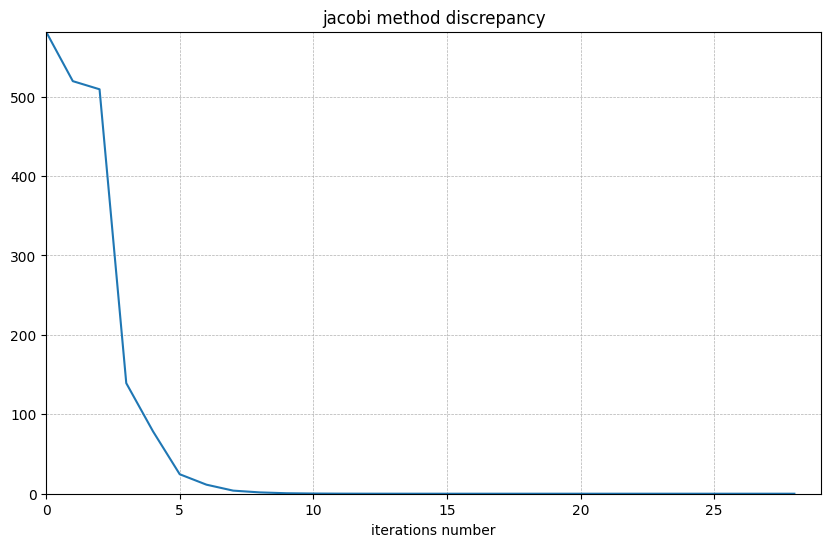

Error value:8.866429616219057e-09
Iteration number: 28


In [96]:
all_errors_list = []

# Ax = b
A = np.array(initMatrix())
b = np.array(initValue(), float)

x = np.zeros_like(b)
iterNum = 0

for it_count in range(ITERATION_LIMIT):
    all_errors_list.append(m_getErrorMatrixNorm(A, x, b))

    x_new = np.zeros_like(x)

    for i in range(A.shape[0]):
        s1 = np.dot(A[i, :i], x[:i])
        s2 = np.dot(A[i, i + 1:], x[i + 1:])
        x_new[i] = (b[i] - s1 - s2) / A[i, i]
        if x_new[i] == x_new[i-1]:
            break
    
    if m_getErrorMatrixNorm(A, x, b) <= SIGMA:
        break

    x = x_new
    iterNum += 1

buildPlot(all_errors_list, 'jacobi')
print(f'Error value:{m_getErrorMatrixNorm(A, x, b)}')
print(f'Iteration number: {iterNum}')

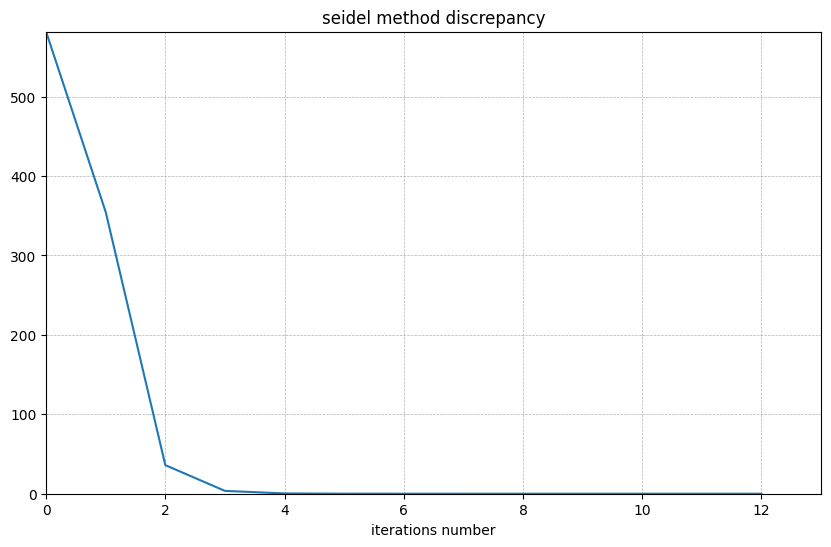

Error value:4.8572469854967224e-09
Iteration number: 12


In [97]:
all_errors_list = []

# Ax = b
A = np.array(initMatrix())
b = np.array(initValue())

x = np.zeros_like(b, np.float_)
iterNum = 0

for it_count in range(1, ITERATION_LIMIT):
    x_new = np.zeros_like(x, dtype=np.float_)
    
    all_errors_list.append(m_getErrorMatrixNorm(A, x, b))

    for i in range(A.shape[0]):
        s1 = np.dot(A[i, :i], x_new[:i])
        s2 = np.dot(A[i, i + 1 :], x[i + 1 :])
        x_new[i] = (b[i] - s1 - s2) / A[i, i]
    
    if m_getErrorMatrixNorm(A, x, b) <= SIGMA:
        break
    
    x = x_new
    iterNum += 1


buildPlot(all_errors_list, 'seidel')

print(f'Error value:{m_getErrorMatrixNorm(A, x, b)}')
print(f'Iteration number: {iterNum}')

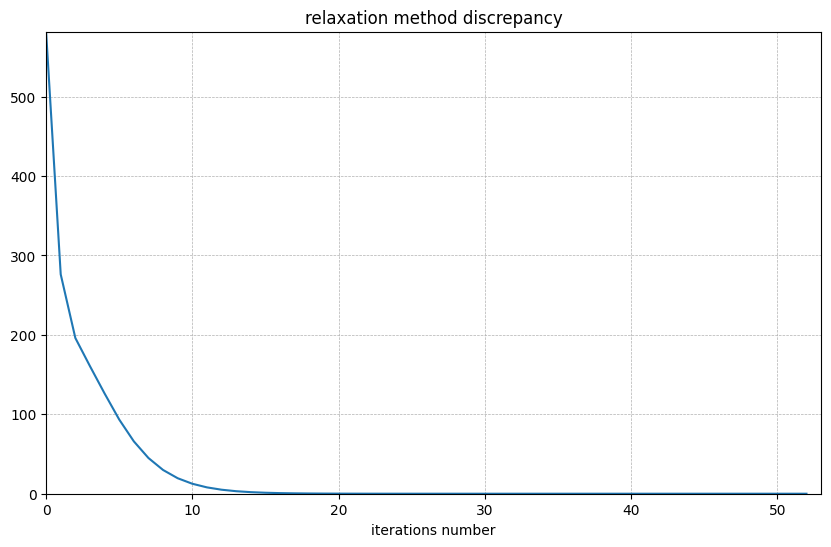

Error value:8.9212849899772e-09
Iteration number: 53


In [98]:
def sor_solver(A, b, omega, initial_guess, convergence_criteria):
    step = 0
    phi = initial_guess[:]
    
    residual = m_getErrorMatrixNorm(A, initial_guess, b)
    
    all_errors_list = []
    
    while residual > convergence_criteria:
        
        all_errors_list.append(m_getErrorMatrixNorm(A, phi, b))

        for i in range(A.shape[0]):
            sigma = 0
            for j in range(A.shape[1]):
                if j != i:
                    sigma += A[i, j] * phi[j]
            phi[i] = (1 - omega) * phi[i] + (omega / A[i, i]) * (b[i] - sigma)
        residual = linalg.norm(A @ phi - b)
        step += 1
    
    buildPlot(all_errors_list, 'relaxation')
    
    return phi, step


omega = 0.5  # Relaxation factor

# Ax = b
A = np.array(initMatrix())
b = np.array(initValue())

initial_guess = np.zeros_like(b, np.float_)

phi, step = sor_solver(A, b, omega, initial_guess, SIGMA)

print(f'Error value:{m_getErrorMatrixNorm(A, phi, b)}')
print(f'Iteration number: {step}')

In [99]:
SIGMA = 1e-8
ITERATION_LIMIT = 100

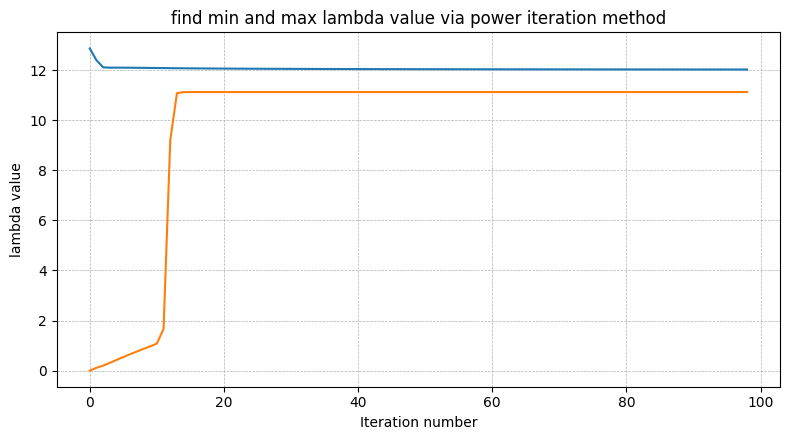

Lambda max: 12.02833323024133; iteration: 99
Lambda max: 11.128444727236499; iteration: 99


In [100]:
def isPosDef(x):
    return np.all(np.linalg.eigvals(x) > 0)


A = np.array(initMatrix())

# initialize the RHS vector
b = np.array(initValue())

x = np.array([2]*len(b)) #np.zeros_like(b, np.float_)

lambda_list = []

for it_count in range(1, ITERATION_LIMIT):
    
    #x_new = np.zeros_like(x, dtype=np.float_)

    x_new = np.dot(A, x) / sqrt(np.dot(np.dot(A, x), np.dot(A, x)))

    lambd = np.dot(np.dot(A, x), x) / np.dot(x, x)

    #print(lambd)
    
    lambda_list.append(lambd)

    x = x_new


max_l = lambda_list[-1]

E = np.eye(len(A))

min_lambda_list = []

B = np.dot(max_l, E) - A

for it_count in range(1, ITERATION_LIMIT):
    
    #x_new = np.zeros_like(x, dtype=np.float_)
    
    x_new = np.dot(B, x) / sqrt(np.dot(np.dot(B, x), np.dot(B, x)))

    lambd = np.dot(np.dot(B, x), x) / np.dot(x, x)

    #print(lambd)
    
    min_lambda_list.append(lambd)

    x = x_new

"""
print(np.dot(A, x))
print(np.dot(min_lambda_list[-1], x))
"""

plt.figure(figsize=(16/2,9/2))
plt.plot(lambda_list)
plt.plot(min_lambda_list)
plt.title('find min and max lambda value via power iteration method')

plt.grid(linestyle = '--', linewidth = 0.5)

plt.xlabel('iteration number')

plt.xlabel('Iteration number')
plt.ylabel('lambda value')

plt.tight_layout()


plt.show()

print(f'Lambda max: {lambda_list[-1]}; iteration: {len(lambda_list)}')
print(f'Lambda max: {min_lambda_list[-1]}; iteration: {len(min_lambda_list)}')
